In [ ]:
import numpy as np
import sympy

#Definindo função para interpolar as funções polinomialmente
def interpolacao(x, fx, n):
  A = np.zeros((n,n))
  i = 0
  j = 0
  for i in range(n):
    for j in range(n):
      if j == 0:
        A[i,j] = 1
      else:
        A[i,j] = x[i] ** j
  
  b = fx.copy()

  a = np.linalg.solve(A, b)

  return np.round(a.flatten(),4)

#Definindo função para interpolar as funções polinomialmente, pelo método de Lagrange
def interplagrange(x, fx, n):
  px = 0
  L = np.ones(n, dtype=object)
  y = sympy.symbols('y')
  for k in range(n):
    for j in range(n):
      if j != k:
        L[k] = sympy.expand(L[k] * ((y - x[j]) / (x[k] - x[j])))
    L[k] = L[k] * fx[k]
    px += L[k]

  px = sympy.Poly(px)
  a = px.all_coeffs()

  return a

#Definindo função para interpolar as funções polinomialmente, pelo método de Newton
def interpnewton(x, fx, n):
  px = 0
  L = np.ones(n, dtype=object)
  A = np.zeros((n, n+1))
  A[:,0], A[:,1] = x[:], fx[:]
  for j in range(2, n+1):
    for i in range(j-1,n):
      A[i,j] = ((A[i,j-1] - A[i-1,j-1]) / (A[i,0] - A[i-j+1,0]))
  
  y = np.zeros(n)
  for i in range(0,n):
    y[i] = A[i,i+1]
  
  k = sympy.symbols('k')

  for i in range(len(y)):
    if i == 0:
      L[i] = (k - x[i])
    else:
      L[i] = sympy.expand((k - x[i]) * L[i-1])
    
    if i == 0:
      px += y[i]
    else:
      px += L[i-1] * y[i]  
  
  px = sympy.Poly(px)
  a = px.all_coeffs()

  return a

#Definindo função para interpolar as funções, pelo método da Spline Cúbica
def interpsplinecub(x, fx, xinterv):
  n = len(x)
  h = np.zeros((n,))
  a = fx
  b = np.zeros((n,))
  d = np.zeros((n,))
  B = np.zeros((n,))
  for i in range(n-1):
    h[i] = x[i+1] - x[i]

  for i in range(1, n-1):
    B[i] = 3 * (a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]
  
  A = np.zeros ((n,n))
  A[0,0] = 1
  A[n-1,n-1] = 1
  for i in range(n-1):
    A[i,i] = 2 * (h[i-1] + h[i])
    for j in range(n-1):
      if i == j+1:
        A[i,j] = h[i-1]
      elif j == i+1:
        A[i,j] = h[i]
  
  c = np.linalg.solve(A,B)
  for j in range(n-1):
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
  
  y = []
  for p in xinterv:
    for i in range(n-1):
      if x[i] <= p <= x[i+1]:
        scub = a[i] + b[i] * (p - x[i]) + c[i] * (p-x[i]) ** 2 + d[i] * (p-x[i]) ** 3
        y.append(scub)
  
  return y

In [ ]:
import numpy as np

#Definindo os pontos x e f(x)
x = np.array([-1.0, 0, 3])
fx = np.array([[15],[8.0],[-1]])
n = 3

#Encontrando os coeficientes da função interpoladora
a = interpolacao(x, fx, n)

p2x0 = a[0] * 1 + a[1] * x[0] + a[2] * (x[0]**2)
p2x1 = a[0] * 1 + a[1] * x[1] + a[2] * (x[1]**2)
p2x2 = a[0] * 1 + a[1] * x[2] + a[2] * (x[2]**2)
print('Os coeficientes do polinômio p2(x) são %s' %(a))
print('Os valores p2(x0), p2(x1) e p2(x2) são, respectivamente: %s, %s, %s' %(p2x0, p2x1, p2x2))

Os coeficientes do polinômio p2(x) são [ 8. -6.  1.]
Os valores p2(x0), p2(x1) e p2(x2) são, respectivamente: 15.0, 8.0, -1.0


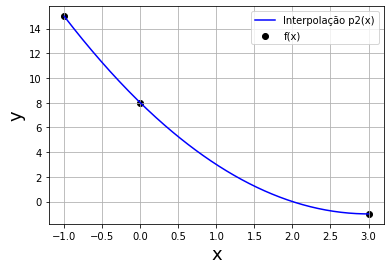

In [ ]:
import matplotlib.pyplot as plt

#Definindo a função p2(x) utilizando os coeficientes a para ajuste
xmult = np.linspace(-1, 3, 200)
p2x = a[0] * 1 + a[1] * xmult + a[2] * (xmult**2)

#Plotando o gráfico de f(x) e p2(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, p2x, color='blue', label='Interpolação p2(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()

In [ ]:
import numpy as np

#Definindo os pontos x e f(x)
x = np.array([0.1, 0.2, 0.3, 0.4])
fx = np.array([[5],[13],[-4],[-8]])
n = 4

#Encontrando os coeficientes da função interpoladora
a = interpolacao(x, fx, n)

p3x0 = a[0] * 1 + a[1] * x[0] + a[2] * (x[0]**2) + a[3] * (x[0]**3)
p3x1 = a[0] * 1 + a[1] * x[1] + a[2] * (x[1]**2) + a[3] * (x[1]**3)
p3x2 = a[0] * 1 + a[1] * x[2] + a[2] * (x[2]**2) + a[3] * (x[2]**3)
p3x3 = a[0] * 1 + a[1] * x[3] + a[2] * (x[3]**2) + a[3] * (x[3]**3)
print('Os coeficientes do polinômio p3(x) são %s' %(a))
print('Os valores p2(x0), p2(x1) e p2(x2) são, respectivamente: %s, %s, %s, %s' %(p3x0, p3x1, p3x2, p3x3))

Os coeficientes do polinômio p3(x) são [  -66.      1151.6667 -5050.      6333.3333]
Os valores p2(x0), p2(x1) e p2(x2) são, respectivamente: 5.000003300000005, 13.000006400000004, -3.9999909000000287, -7.999988799999983


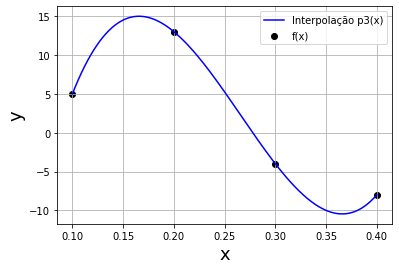

In [ ]:
import matplotlib.pyplot as plt

#Definindo a função p3(x) utilizando os coeficientes a para ajuste
xmult = np.linspace(0.1, 0.4, 200)
p2x = a[0] * 1 + a[1] * xmult + a[2] * (xmult**2) + a[3] * (xmult**3)

#Plotando o gráfico de f(x) e p3(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, p2x, color='blue', label='Interpolação p3(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()

In [ ]:
import numpy as np

#Definindo os pontos x e f(x)
x = [-1.0, 0, 2]
fx = [4, 1.0, -1]
n = 3

#Encontrando os coeficientes da função interpoladora
a = interplagrange(x, fx, n)
print('A função interpoladora polinomial, pelo método de Lagrange, tem os seguintes coeficientes: %s' %(a))

0.666666666666667*y**2 - 2.33333333333333*y + 1.0
A função interpoladora polinomial, pelo método de Lagrange, tem os seguintes coeficientes: [0.666666666666667, -2.33333333333333, 1.00000000000000]


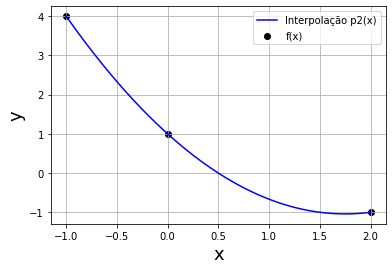

In [ ]:
import matplotlib.pyplot as plt

#Definindo a função p2(x) utilizando os coeficientes a para ajuste
xmult = np.linspace(-1, 2, 200)
p2x = a[2] * 1 + a[1] * xmult + a[0] * (xmult**2)

#Plotando o gráfico de f(x) e p2(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, p2x, color='blue', label='Interpolação p2(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()

In [ ]:
import numpy as np

#Definindo os pontos x e f(x)
x = [-1.0, 0, 1, 2, 3]
fx = [1, 1.0, 0, -1, -2]
n = 5

#Encontrando os coeficientes da função interpoladora
a = interpnewton(x, fx, n)
print('A função interpoladora polinomial, pelo método de Newton, tem os seguintes coeficientes: %s' %(a))

A função interpoladora polinomial, pelo método de Newton, tem os seguintes coeficientes: [-0.0416666666666667, 0.250000000000000, -0.458333333333333, -0.750000000000000, 1.00000000000000]


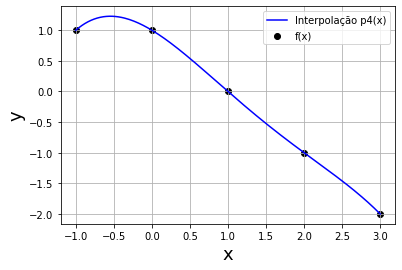

In [ ]:
import matplotlib.pyplot as plt

#Definindo a função p4(x) utilizando os coeficientes a para ajuste
xmult = np.linspace(-1, 3, 200)
p4x = a[4] + a[3]*xmult + a[2]*(xmult**2) + a[1]*(xmult**3) + a[0]*(xmult**4)

#Plotando o gráfico de f(x) e p4(x)
fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xmult, p4x, color='blue', label='Interpolação p4(x)')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()

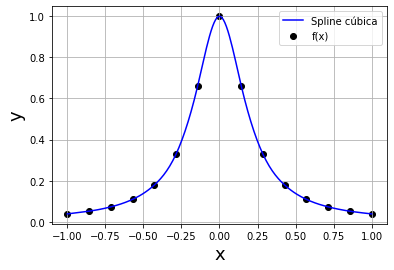

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 15)
fx = 1/(1 + 25*(x**2))
xinterv = np.linspace(-1, 1, 200)

y = interpsplinecub(x, fx, xinterv)

fig, ax = plt.subplots()
ax.scatter(x, fx, color='black', label='f(x)')
ax.plot(xinterv, y, color='blue', label='Spline cúbica')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.legend()

plt.grid()
plt.show()